<a href="https://colab.research.google.com/github/samir-nit/Machine-Learning-and-Deep-learning/blob/main/CNNbeginer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
!pip install mlxtend

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
print(tf.__version__)

2.5.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tensorflow.keras.datasets import cifar10
%matplotlib inline

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train.max()

255

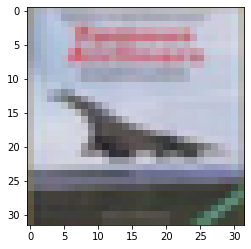

In [ ]:
plt.imshow(X_test[3])

In [ ]:
classes_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
x = range(10)
while i in x: 
  
  plt.imshow(X_test[i])
  i += 1

NameError: ignored

In [ ]:
X_train = X_train/255
X_test = X_test/255
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape = [32, 32, 3]))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))



In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 16)        4624      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 32)       

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 346s 69ms/step - loss: 1.5798 - sparse_categorical_accuracy: 0.4202 - val_loss: 1.2753 - val_sparse_categorical_accuracy: 0.5359
Epoch 2/10
5000/5000 [==============================] - 333s 67ms/step - loss: 1.1616 - sparse_categorical_accuracy: 0.5863 - val_loss: 1.0289 - val_sparse_categorical_accuracy: 0.6341
Epoch 3/10
5000/5000 [==============================] - 337s 67ms/step - loss: 0.9925 - sparse_categorical_accuracy: 0.6479 - val_loss: 0.9397 - val_sparse_categorical_accuracy: 0.6711
Epoch 4/10
5000/5000 [==============================] - 335s 67ms/step - loss: 0.8979 - sparse_categorical_accuracy: 0.6829 - val_loss: 0.8597 - val_sparse_categorical_accuracy: 0.6986
Epoch 5/10
5000/5000 [==============================] - 335s 67ms/step - loss: 0.8362 - sparse_categorical_accuracy: 0.7050 - val_loss: 0.8952 - val_sparse_categorical_accuracy: 0.6856
Epoch 6/10
5000/5000 [==============================] - 334s 67ms/step - lo

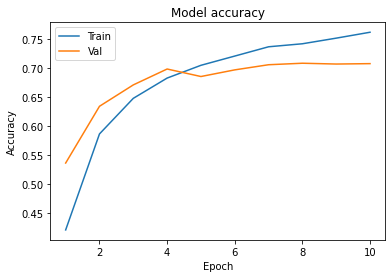

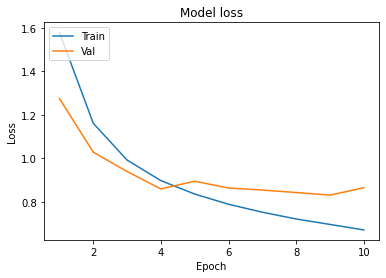

313/313 - 11s - loss: 0.8652 - sparse_categorical_accuracy: 0.7079


In [ ]:
# Plot training & validation accuracy values
epoch_range = range(1, 11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[730,  12,  61,  25,  27,   7,  17,   6,  85,  30],
       [ 17, 839,   2,   9,   9,   4,  21,   2,  34,  63],
       [ 52,   0, 549,  35, 118,  79, 122,  16,  24,   5],
       [ 28,   5,  63, 418, 106, 169, 163,  25,  16,   7],
       [ 11,   3,  52,  33, 707,  20, 136,  25,  11,   2],
       [  8,   4,  51, 145,  65, 608,  84,  23,   9,   3],
       [  5,   2,  21,  29,  28,  14, 892,   2,   6,   1],
       [  7,   4,  43,  28, 128,  60,  25, 694,   6,   5],
       [ 45,  18,  11,  13,   7,   6,  13,   5, 865,  17],
       [ 26,  68,   6,  19,  17,   3,  23,  25,  36, 777]])

In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt

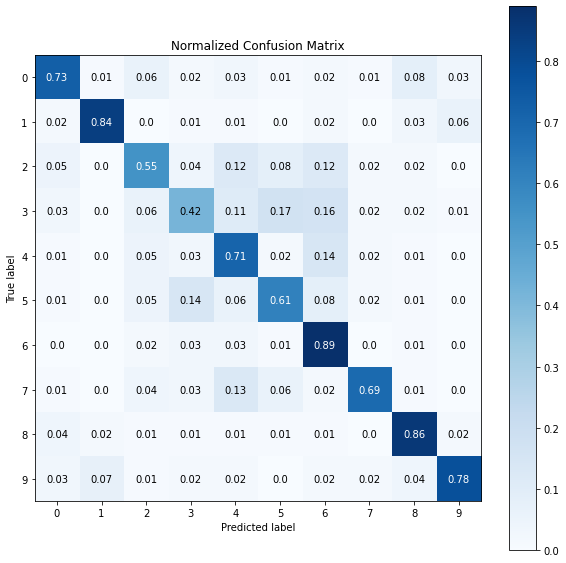

In [ ]:
#plot_confusion_matrix(mat,figsize=(9,9),display_labels=classes_name, show_normed=True)

# rf = rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,labels=None,figsize=(10,10), normalize=True)

plt.show()